## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

/Users/simonbedford/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/simonbedford/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


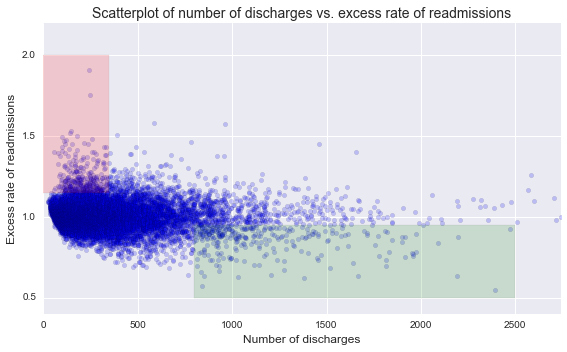

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

***A. Do you agree with the above analysis and recommendations? Why or why not?***

I do not agree with the preliminary analysis and recommendations.

- The definition states that applicable conditions are acute myocardial infarction (AMI), heart failure (HF), and pneumonia (PN); the above analysis includes other measures such as COPD and HIP-KNEE
- With the scatterplot I don't think it is possible to draw such strong conclusions just by 'eyeballing' it
- There is no proper hypothesis testing, and so simply stating that one mean is higher than the other etc., is not sound analysis
- Conclusions and recommendations are drawn at the hospital level, whereas the analysis is carried out at the medical condition level (e.g., pneumonia, heart attack etc.)
- The recommendations seem to be overly strong and confident based upon such weak analysis

***B. Provide support for your arguments and your own recommendations with a statistically sound analysis***

In [5]:
hospital_read_df.head(1)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013


In [6]:
list(hospital_read_df['Measure Name'].unique())

['READM-30-HIP-KNEE-HRRP',
 'READM-30-HF-HRRP',
 'READM-30-COPD-HRRP',
 'READM-30-PN-HRRP',
 'READM-30-AMI-HRRP']

In [7]:
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Measure Name'].isin(['READM-30-HF-HRRP', 'READM-30-PN-HRRP', 'READM-30-AMI-HRRP'])]

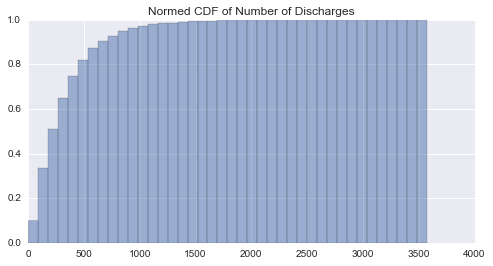

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(clean_hospital_read_df['Number of Discharges'], cumulative=True, normed=True, bins=40, alpha=0.5)
ax.set_title('Normed CDF of Number of Discharges', fontsize=12)
plt.show()

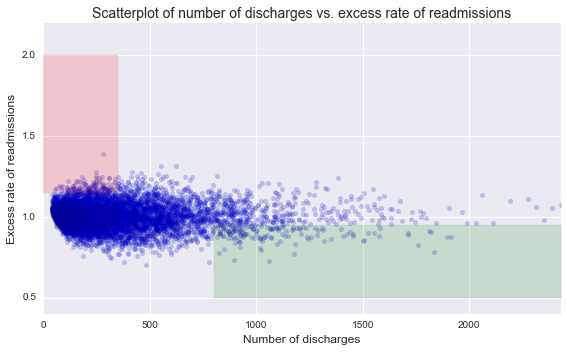

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

We will carry out a hypothesis test for the hypothesis that hospitals with a lower number of discharges have a higher excess readmission rate than hospitals with a higher number of discharges.

Let r be the excess readmission rate.

- H0: Mean r for hospitals with <= 100 discharges = mean r for hospitals with > 1000 discharges
- H1: Mean r for hospitals with <= 100 discharges > mean r for hospitals with > 1000 discharges

We will use a one-sided t-test.

In [10]:
small = list(clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] <= 100) & (clean_hospital_read_df['Number of Discharges'] > 0)]['Excess Readmission Ratio'])
large = list(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'])

In [11]:
t_stat, p = stats.ttest_ind(small, large)

print("t-statistic is {} and p-value is {}".format(t_stat, p/2))

t-statistic is 5.477184250516055 and p-value is 2.6353381175107823e-08


In [12]:
# Effect size
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = np.mean(group1) - np.mean(group2)

    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1)
    var2 = np.var(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [13]:
print("Cohen's d is {}".format(CohenEffectSize(small, large)))

Cohen's d is 0.381946283414991


So the difference between small and large falls towards the lower end of a medium effect size

One final thing I am interested in looking at is whether this is a common effect across medical conditions:

In [14]:
names = ['Heart Failure', 'Pneumonia', 'Heart Attack']
for n, m in zip(names, ['READM-30-HF-HRRP', 'READM-30-PN-HRRP', 'READM-30-AMI-HRRP']):
    small = list(clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] <= 100) & (clean_hospital_read_df['Number of Discharges'] > 0) & (clean_hospital_read_df['Measure Name'] == m)]['Excess Readmission Ratio'])
    large = list(clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000) & (clean_hospital_read_df['Measure Name'] == m)]['Excess Readmission Ratio'])
    t_stat, p = stats.ttest_ind(small, large)
    d = CohenEffectSize(small, large)
    print("Measure: {}, sample sizes: [{}, {}], p-value: {}, Cohen's d: {}".format(n, len(small), len(large), p/2, d))

Measure: Heart Failure, sample sizes: [345, 178], p-value: 0.0007675878578746017, Cohen's d: 0.29447372217557405
Measure: Pneumonia, sample sizes: [192, 56], p-value: 0.42331800490059385, Cohen's d: 0.029524441647161188
Measure: Heart Attack, sample sizes: [388, 31], p-value: 3.1024913405809815e-07, Cohen's d: 0.9472378285636603


Some conclusions:

Statistics:

- Based on our tests, we can see that overall excess admission rates are higher for hospitals with a lower number of discharges (<=100), vs. hospitals with a higher number of discharges (>1000), and this result has high statistical significance with our p-value not just less than 0.01, but less than 0.0001
- However, the story seems like it might be more complicated than this as the effect does not seem to hold in the case of Pneumonia, but does seem to hold for heart-related conditions (although we need to be careful about sample sizes)

Practical / recommendations:

- We need to take into account that these tests are based upon results for invididual medical conditions, and we are using discharges as a proxy for hospital size
- However there are some potential issues with this particular approach, for example some hospitals may be more likely than others to receive a particular type of patient for reasons other than size
- Furthermore, each line represents a result for a particular medical condition for a given hospital, not the overall results for the hospital
- We also saw that there seem to be differences in outcome for heart-related conditions vs. pneumonia; so it may be the case that for smaller hospitals, certain types of condition are easier to manage effectively than others which may require more specialization
- Overall I am not sure that we have enough evidence to recommend a particular action with regards to smaller hospitals, and instead would recommend further analysis to try and more clearly identify the key underlying factors in excess readmission rates 

